# Entanglement

 
When two quantum states are entangled a measurement on one of the two states can affect the other state.

**What:** we will set up a series of experiments where we do measurements on entangled states. 

**Learning goal:** to be able to predict the outcome of a measurement on an entangled state.



Let's first import the relevant packages

In [1]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

# Our first measurement

We consider a system with just two q-bits. The first q-bit is in the state $1/\sqrt{2}(|0\rangle+|1\rangle)$ while the second q-bit is in the state $|0\rangle$. Hence the state of the system is

\begin{equation}
|\psi\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle+|01\rangle\big) \ .
\end{equation}

We now measure the usual operator $M$, which in the basis ($|0\rangle,|1\rangle$) is 

\begin{equation}
M= \left(\begin{array}{cc} 0 & 0 \\ 0 & 1 \end{array}\right) \ ,
\end{equation}

on each q-bit.

**Exercise 1:** Predict the outcome of the measurement. Is the result of the measuremet on the first q-bit correlated with the result of the measurement on the second q-bit? 

Now check that your prediction is consistent with the result of the experiment below.

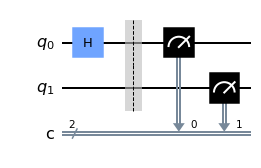

In [2]:
circ = QuantumCircuit(2,2)
circ.h(0) # puts the first q-bit in the desired state
circ.barrier() # just a vertical line which seperates where we set up the state and where we measure. 
circ.measure(0,0)
circ.measure(1,1)
circ.draw()

In [3]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['00', '00', '00', '00', '01', '00', '00', '01', '00', '01']


**How to read the out-put:** We have performed the experiment 10 times and each time we get two out-puts, namely the value of the two measurements. The rightmost value in the pair is the value of the measurement on the first q-bit and the leftmost in the pair is the value obtained from the measurement on the second q-bit.

**Check:** Did your predicition match the result? If not go back and reconsider what may have gone wrong.

Now let's couple the two q-bits to create the entangled state

\begin{equation}
|\psi\rangle = \frac{1}{\sqrt{2}}\big(|00\rangle +|11\rangle \big)
\end{equation}

**Exercise 2:** Determine the probability that a measurement of $M$ on the first q-bit yields 0.

**Exercise 3:** Suppose a measurement on the first q-bit has given the value $0$. What can we say about the probability to subsequently measure the value $1$ on the second q-bit? 

Time to check your predictions with the quantum circut below!

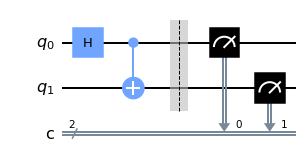

In [4]:
circ1 = QuantumCircuit(2,2)
circ1.h(0) # this and the next line sets up the desired state
circ1.cx(0,1)
circ1.barrier() # add a vertical line, just to make the setup more clear
circ1.measure(0,0) 
circ1.measure(1,1)
circ1.draw()

In [5]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(circ1, shots=10, memory=True).result()
memory = result.get_memory(circ1)
print(memory)

['11', '00', '00', '11', '00', '11', '11', '11', '00', '11']


**Check:** Did your prediction match the outcome? 

**Don't miss:** The measurement of the first q-bit collapes the state of the first q-bit to the eigenstate which belong to the eigenvalue measured. If for example the value of the measurement on the first q-bit is 0 then the state of the first q-bit after the measurement will be $|0\rangle$. Because the two q-bits are entangled the second q-bit follows along and the state of the total system after measuring the first q-bit is $|00\rangle$ (or $|11\rangle$ if we measured 1 on the first q-bit). Hence the measurement on the second q-bit here gives the same value as that measured on the first!  

**Generalization to 3 q-bits**:

Any number of q-bits can be entangled, for example with 3 q-bits we can start the system in the state 

\begin{equation}
|\psi\rangle =\frac{1}{\sqrt{2}}\big(|000\rangle +|111\rangle \big)
\end{equation}

In order to understand better how measurements on entangeled states affect the state, let's add a third q-bit to our system, and then put the three 3-bits into the entangled state above. In this state we then measure $M$ on the first of the 3 q-bits

In [ ]:
circ3 = QuantumCircuit(3,1)
circ3.h(0) # This and the following two lines sets up the desired state
circ3.cx(0,1)
circ3.cx(1,2)
circ3.barrier()
circ3.measure(0,0) # This performs the measurement on the first q-bit
circ3.draw()

In [ ]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(circ3, shots=10, memory=True).result()
memory = result.get_memory(circ3)
print(memory)

**Exercise 4:**  Explain the result of this measurement.
    
**Exercise 5:**  Predict the outcome if we subsequently measure $M$ on the second q-bit.


As always check your prediction with the circut below.

In [ ]:
circ3 = QuantumCircuit(3,2)
circ3.h(0) # This and the following two lines sets up the desired state
circ3.cx(0,1)
circ3.cx(1,2)
circ3.barrier()
circ3.measure(0,0) # This performs the measurement on the first q-bit
circ3.measure(1,1) # This performs the measurement on the second q-bit
circ3.draw()

In [ ]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(circ3, shots=10, memory=True).result()
memory = result.get_memory(circ3)
print(memory)

**Check:**  Hopefully your prediction matched the outcome?

**Don't miss:** Note how the measurement on a single q-bit can affect the state on all q-bits (provided that the state is sufficiently entangled).

It is of course tempting also to measure $M$ on the third q-bit. Let's do so

In [ ]:
circ3 = QuantumCircuit(3,3)
circ3.h(0) # This and the following two lines sets up the desired state
circ3.cx(0,1)
circ3.cx(1,2)
circ3.barrier()
circ3.measure(0,0) # This performs the measurement on the first q-bit
circ3.measure(1,1) # This performs the measurement on the second q-bit
circ3.measure(2,2) # This performs the measurement on the second q-bit
circ3.draw()

In [ ]:
simulator = Aer.get_backend('aer_simulator')

result = simulator.run(circ3, shots=10, memory=True).result()
memory = result.get_memory(circ3)
print(memory)

**Exercise 6:** Make sure that you understand why the 3 measured values are always identical. Also make sure you understand what the probabilities are to get either combination.

**Take home:** Measurements on entangled states not only changes the q-bit which we perform the measurement on, it also changes the states which are entangled with the q-bit we do the measurement on.